# Online Payments Fraud Detection

### import libraries and dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('PS_20174392719_1491204439457_log.csv')
raw_data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [3]:
raw_data.shape

(6362620, 11)

### preprocessing 

In [4]:
raw_data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
raw_data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

([<matplotlib.patches.Wedge at 0x7ff279b52c40>,
 [Text(0.49426122663384003, 0.9827033325711335, 'CASH_OUT'),
  Text(-1.0906766219942048, -0.1429143318051433, 'PAYMENT'),
  Text(0.3384112332518691, -1.046650771369777, 'CASH_IN'),
  Text(1.0495474656709025, -0.3293176541028222, 'TRANSFER'),
  Text(1.0997698357971, -0.022501294869852733, 'DEBIT')],
 [Text(0.26959703270936725, 0.5360199995842546, '35%'),
  Text(-0.594914521087748, -0.07795327189371452, '34%'),
  Text(0.1845879454101104, -0.5709004207471511, '22%'),
  Text(0.5724804358204921, -0.17962781132881211, '8%'),
  Text(0.5998744558893272, -0.012273433565374218, '1%')])

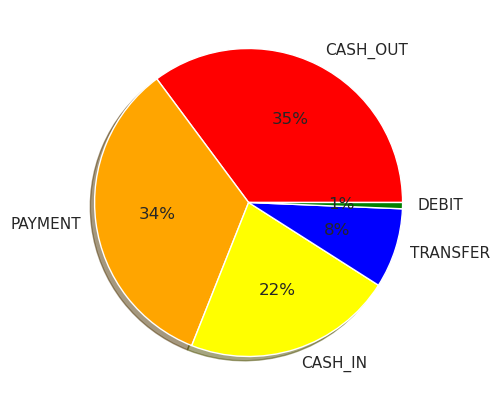

In [6]:
x = raw_data['type'].value_counts()
y = x.index
plt.figure(figsize=(10,5))
plt.pie(x=x, labels=y, autopct='%.0f%%', shadow=True, colors=['red','orange','yellow','blue','green'])

In [7]:
correlation = raw_data.corr()
correlation['isFraud'].sort_values(ascending=False)

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64

In [8]:
data = raw_data.drop('isFlaggedFraud',axis = 1)

In [9]:
data.shape

(6362620, 10)

In [10]:
data['type'] = data['type'].map({'CASH_OUT':1, 'PAYMENT':2, 'CASH_IN':3, 'TRANSFER':4, 'DEBIT':5})

In [11]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [12]:
inputs = np.array(data[['type','amount','oldbalanceOrg','newbalanceOrig']])
targets = np.array(data[['isFraud']])
print(inputs.shape)
print(targets.shape)

(6362620, 4)
(6362620, 1)


In [13]:
inputs

array([[2.00000000e+00, 9.83964000e+03, 1.70136000e+05, 1.60296360e+05],
       [2.00000000e+00, 1.86428000e+03, 2.12490000e+04, 1.93847200e+04],
       [4.00000000e+00, 1.81000000e+02, 1.81000000e+02, 0.00000000e+00],
       ...,
       [1.00000000e+00, 6.31140928e+06, 6.31140928e+06, 0.00000000e+00],
       [4.00000000e+00, 8.50002520e+05, 8.50002520e+05, 0.00000000e+00],
       [1.00000000e+00, 8.50002520e+05, 8.50002520e+05, 0.00000000e+00]])

In [14]:
targets

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])

### modeling

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=0)

In [16]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [18]:
y_pred = model.predict(x_test)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [21]:
print('The Confusion Matrix :')
print(cm)

The Confusion Matrix :
[[1270693     190]
 [    206    1435]]


In [22]:
print('The Accuracy Is : {:.2f}%'.format(acc*100))

The Accuracy Is : 99.97%


### predict new results 

In [23]:
new_result = model.predict([[4, 9000.60, 9000.60, 0.0]])
if new_result[0] == 0:
    print('No Fraud')
elif new_result[0] == 1:
    print('Fraud')

Fraud
